In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
d = pd.read_excel("/content/PRG-3 (11_32_21 am).xlsx")

In [ ]:
d.head()

,2024-04-29 00:00:00,10:19:17 am,3,1000,30,STANDBY,0 Hr 0 Min,0,32,42746,45
0,2024-04-29,10:19:18 am,3,900,NaN,undefined,7 Hr 4 Min,516,NaN,NaN,0
1,2024-04-29,10:19:20 am,2,1200,Hot,IDEAL,0 Hr 0 Min,0,0.0,0.0,0
2,2024-04-29,10:19:23 am,2,1200,Hot,IDEAL,0 Hr 0 Min,0,0.0,0.0,0
3,2024-04-29,10:19:25 am,3,1000,30,IDEAL,2 Hr 15 Min,0,32.0,42746.0,45
4,2024-04-29,10:19:27 am,3,1000,30,IDEAL,2 Hr 15 Min,0,32.0,42743.0,45


In [ ]:
d.columns = ["date" , "time" , "program" ,"selected_rpm" , "selected_temp","operation","program_time","rpm" ,"k","freq", "ipm_temp"]

In [ ]:
d.head()

,date,time,program,selected_rpm,selected_temp,operation,program_time,rpm,k,freq,ipm_temp
0,2024-04-29,10:19:18 am,3,900,NaN,undefined,7 Hr 4 Min,516,NaN,NaN,0
1,2024-04-29,10:19:20 am,2,1200,Hot,IDEAL,0 Hr 0 Min,0,0.0,0.0,0
2,2024-04-29,10:19:23 am,2,1200,Hot,IDEAL,0 Hr 0 Min,0,0.0,0.0,0
3,2024-04-29,10:19:25 am,3,1000,30,IDEAL,2 Hr 15 Min,0,32.0,42746.0,45
4,2024-04-29,10:19:27 am,3,1000,30,IDEAL,2 Hr 15 Min,0,32.0,42743.0,45


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
d["operation"].astype("string")

0        undefined
1            IDEAL
2            IDEAL
3            IDEAL
4            IDEAL
           ...    
23110      RINSE_2
23111      RINSE_2
23112      RINSE_2
23113      RINSE_2
23114      RINSE_2
Name: operation, Length: 23115, dtype: string

In [ ]:
print(d["operation"].dtype)
print(d["selected_rpm"].dtype)

object
object


In [ ]:
if d["rpm"].dtype != 'int64' :
  d.drop(axis = 'index')

In [ ]:
d.head()

,date,time,program,selected_rpm,selected_temp,operation,program_time,rpm,k,freq,ipm_temp
0,2024-04-29,10:19:18 am,3,900,NaN,undefined,7 Hr 4 Min,516,NaN,NaN,0
1,2024-04-29,10:19:20 am,2,1200,Hot,IDEAL,0 Hr 0 Min,0,0.0,0.0,0
2,2024-04-29,10:19:23 am,2,1200,Hot,IDEAL,0 Hr 0 Min,0,0.0,0.0,0
3,2024-04-29,10:19:25 am,3,1000,30,IDEAL,2 Hr 15 Min,0,32.0,42746.0,45
4,2024-04-29,10:19:27 am,3,1000,30,IDEAL,2 Hr 15 Min,0,32.0,42743.0,45


In [ ]:
if d['operation'].dtype == 'object':
  d_filtered = d[d['operation'] != 'IDEAL']
  print(d_filtered)
else:
  print("The data type of 'column_name' is not object")

            date          time  program selected_rpm selected_temp  operation  \
0     2024-04-29   10:19:18 am        3          900           NaN  undefined   
38    2024-04-29   10:20:39 am        3          800            40      START   
39    2024-04-29   10:20:41 am        3          800            40      START   
40    2024-04-29   10:20:43 am        3          800            40      START   
41    2024-04-29   10:20:45 am        3          800            40      DRAIN   
...          ...           ...      ...          ...           ...        ...   
23110 2024-04-29   11:59:50 pm        2      No Spin            40    RINSE_2   
23111 2024-04-29   11:59:52 pm        2      No Spin            40    RINSE_2   
23112 2024-04-29   11:59:54 pm        2      No Spin            40    RINSE_2   
23113 2024-04-29   11:59:56 pm        2      No Spin            40    RINSE_2   
23114 2024-04-29   11:59:58 pm        2      No Spin            40    RINSE_2   

      program_time  rpm    

In [ ]:
start_index = d_filtered[d_filtered['operation'] == "START"].index.tolist()
if start_index:  # Check if "START" exists
    start_index = start_index[0]
else:
    print("WARNING: 'START' not found in the 'operation' column.")
    start_index = None  # Handle missing "START"

end_index = d_filtered[d_filtered['operation'] == "END"].index.tolist()
if end_index:  # Check if "END" exists
    end_index = end_index[0]
else:
    print("WARNING: 'END' not found in the 'operation' column.")
    end_index = None  # Handle missing "END"

# Filter the DataFrame (keep rows between START and END, including them)
if start_index is not None and end_index is not None:
    filtered_df = d_filtered.iloc[start_index:end_index + 1]
    print(filtered_df)
else:
    print("No valid range found between 'START' and 'END'.")

           date          time  program selected_rpm selected_temp operation  \
75   2024-04-29   10:21:59 am        3          800            40     DRAIN   
76   2024-04-29   10:22:01 am        3          800            40     DRAIN   
77   2024-04-29   10:22:03 am        3          800            40     DRAIN   
78   2024-04-29   10:22:05 am        3          800            40     DRAIN   
79   2024-04-29   10:22:07 am        3          800            40     DRAIN   
...         ...           ...      ...          ...           ...       ...   
3793 2024-04-29   12:34:15 pm        3          800            40       END   
3794 2024-04-29   12:34:17 pm        3          800            40       END   
3795 2024-04-29   12:34:19 pm        3          800            40       END   
3796 2024-04-29   12:34:21 pm        3          800            40       END   
3797 2024-04-29   12:34:23 pm        3          800            40       END   

     program_time  rpm     k     freq  ipm_temp  
7

In [ ]:
filtered_df.shape

(3687, 11)

In [ ]:
filtered_df.to_excel("output1.xlsx")

In [ ]:
filter = filtered_df[filtered_df["rpm"]>1000]
filtered_df = filtered_df.drop(filter.index)

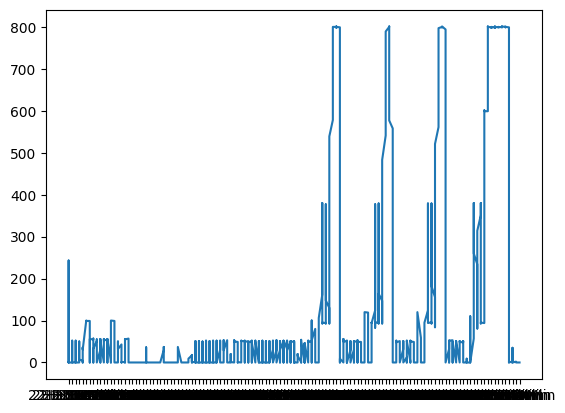

In [ ]:
plt.plot(filtered_df["program_time"], filtered_df["rpm"])
plt.show()

In [ ]:
filtered_df.to_excel("output2.xlsx")

In [ ]:
filtered_df['program_time'].head(10)

75    2 Hr 16 Min
76    2 Hr 16 Min
77    2 Hr 16 Min
78    2 Hr 16 Min
79    2 Hr 16 Min
80    2 Hr 16 Min
81    2 Hr 16 Min
82    2 Hr 16 Min
83    2 Hr 16 Min
84    2 Hr 16 Min
Name: program_time, dtype: object

In [ ]:
def parse_time_string(time_str):
  parts = time_str.split(' Hr ')
  hours = int(parts[0])
  minutes = int(parts[1].replace(' Min', ''))
  # return pd.Timedelta(hours=hours, minutes=minutes)
  return f"{hours}:{minutes}:00"

filtered_df['program_time'] = filtered_df['program_time'].apply(parse_time_string)
print(filtered_df['program_time'])

75      2:16:00
76      2:16:00
77      2:16:00
78      2:16:00
79      2:16:00
         ...   
3793     0:0:00
3794     0:0:00
3795     0:0:00
3796     0:0:00
3797     0:0:00
Name: program_time, Length: 3686, dtype: object


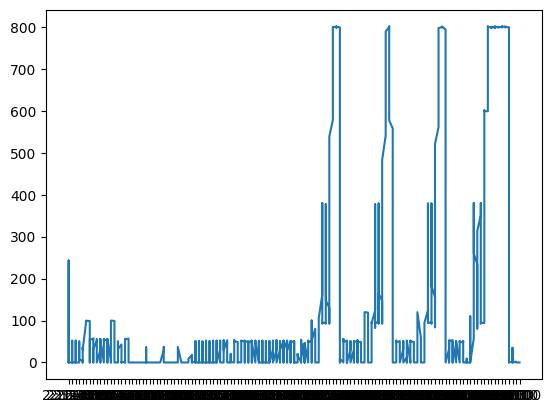

In [ ]:
plt.plot(filtered_df["program_time"], filtered_df["rpm"])
plt.show()

In [ ]:
!pip install adtk

In [ ]:
import pandas as pd
from adtk.data import validate_series
import matplotlib.pyplot as plt
from adtk.visualization import plot
from adtk.detector import *

In [7]:
filtered_df["program_time"] = pd.to_datetime(filtered_df["program_time"],format='%H:%M:%S')
ub = filtered_df.set_index("program_time")
k = validate_series(ub)
plot(k)

NameError: name 'filtered_df' is not defined

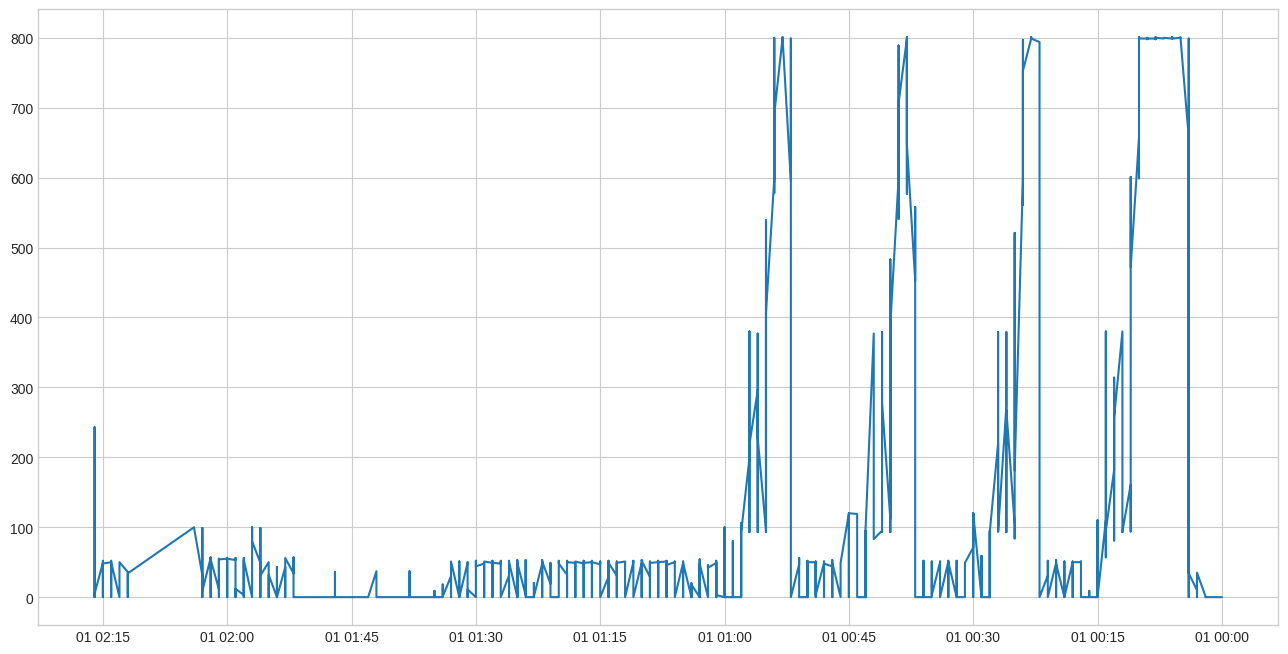

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(filtered_df["program_time"], filtered_df["rpm"])
plt.gca().invert_xaxis()
plt.show()

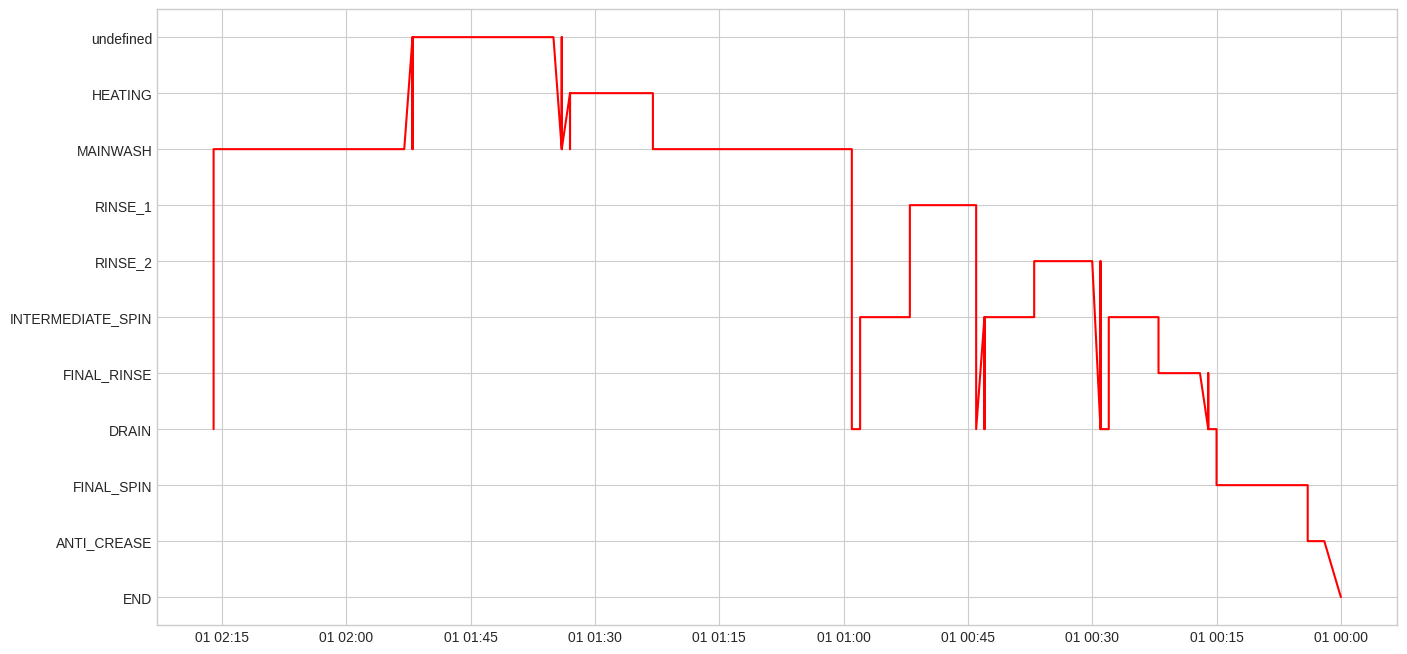

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(filtered_df["program_time"], filtered_df["operation"],color = 'r')
plt.gca().invert_xaxis()
plt.show()

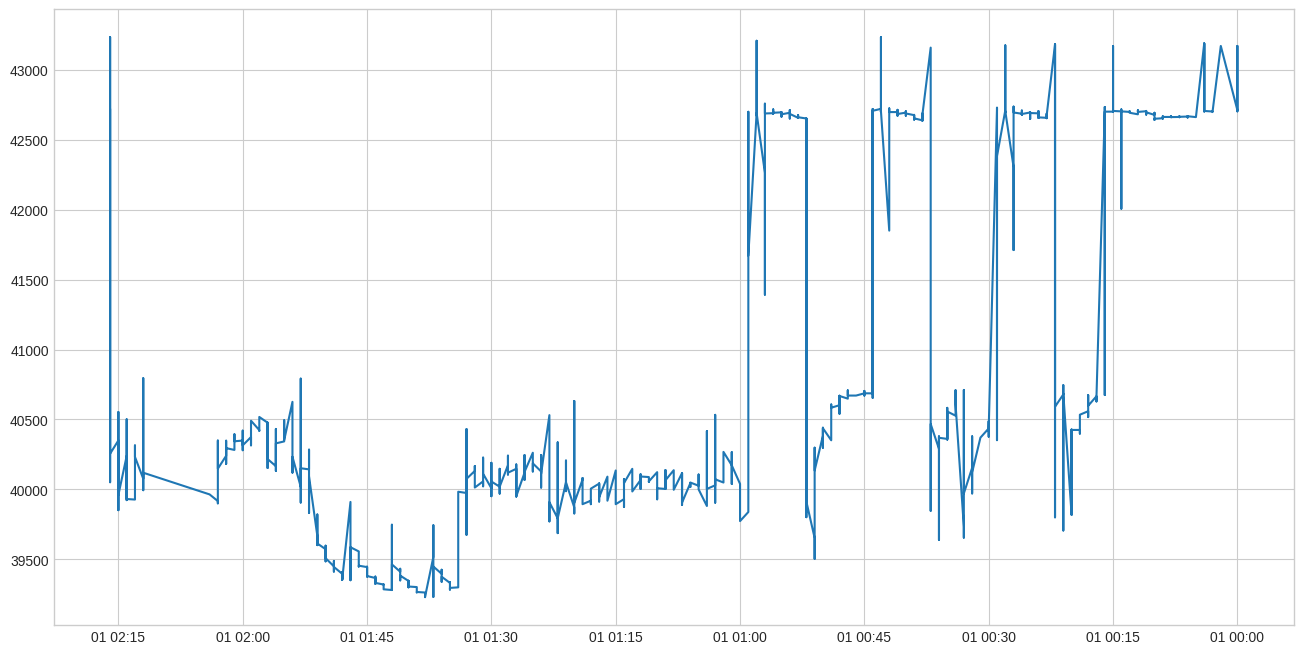

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(filtered_df["program_time"], filtered_df["freq"])
plt.gca().invert_xaxis()
plt.show()

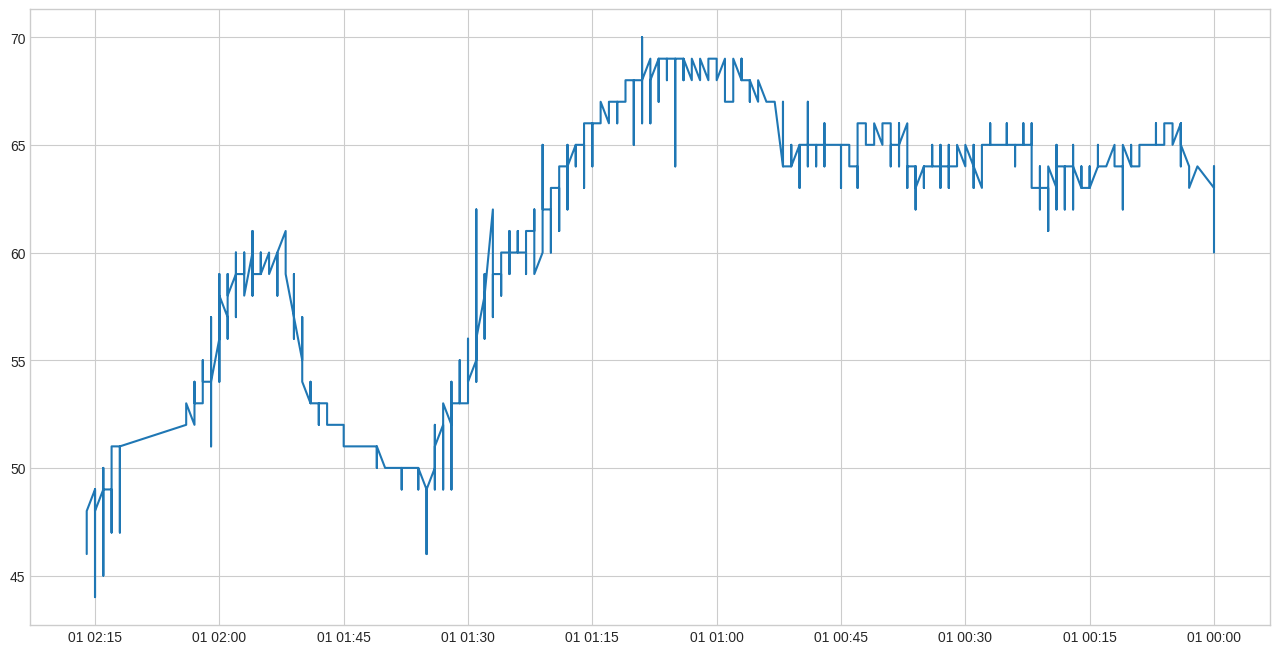

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(filtered_df["program_time"], filtered_df["ipm_temp"])
plt.gca().invert_xaxis()
plt.show()

In [ ]:
#filtered_df[ (filtered_df["operation"] == "DRAIN") & (filtered_df["rpm"] > 200) ][["program_time", "rpm"]]  working

filtered_df_drain = filtered_df[filtered_df['operation'] == 'DRAIN']
filtered_df_drain_high_rpm = filtered_df_drain[filtered_df_drain['rpm'] > 200]
load_sensing_rpm = filtered_df_drain_high_rpm['rpm']
load_sensing_time = filtered_df_drain_high_rpm['program_time']
print(load_sensing_rpm)
print(load_sensing_time)

85    243
Name: rpm, dtype: int64
85   1900-01-01 02:16:00
Name: program_time, dtype: datetime64[ns]


In [3]:
def filter_program_data(filepath):

  try:


    if filepath.endswith('.xlsx'):
      d = pd.read_excel(filepath)
    else:
      d = pd.read_csv(filepath)

    expected_columns = ["date", "time", "program", "selected_rpm", "selected_temp",
              "operation", "program_time", "rpm", "k", "freq", "ipm_temp"]

    if len(d.columns) < len(expected_columns):
      print(f"Warning: The file has {len(d.columns)} columns, expected {len(expected_columns)} columns.")
      d.columns = expected_columns[:len(d.columns)]
    elif len(d.columns) > len(expected_columns):
      print(f"Warning: The file has {len(d.columns)} columns, more than the expected {len(expected_columns)} columns. Extra columns will be ignored.")
      d.columns = expected_columns
    else:
      d.columns = expected_columns

    #d["operation"] = d["operation"].astype("string")

    if d["rpm"].dtype != 'int64':
      d = d.dropna(subset=['rpm'])

    if d['operation'].dtype == 'object':
      d_filtered = d[d['operation'] != 'IDEAL']
    else:
      print("The data type of 'column_name' is not object")

    start_index = d_filtered[d_filtered['operation'] == "START"].index.tolist()
    if start_index:
      start_index = start_index[0]
    else:
      print("WARNING: 'START' not found in the 'operation' column.")
      start_index = None

    end_index = d_filtered[d_filtered['operation'] == "END"].index.tolist()
    if end_index:
      end_index = end_index[0]
    else:
      print("WARNING: 'END' not found in the 'operation' column.")
      end_index = None

    if start_index is not None and end_index is not None:
      filtered_df = d_filtered.iloc[start_index:end_index + 1]
    else:
      print("No valid range found between 'START' and 'END'.")

    filter = filtered_df[filtered_df["rpm"]>1000]
    filtered_df = filtered_df.drop(filter.index)

    filtered_df['program_time'] = filtered_df['program_time'].apply(parse_time_string)
    filtered_df["program_time"] = pd.to_datetime(filtered_df["program_time"],format='%H:%M:%S')
    return filtered_df

  except FileNotFoundError:
    print("Error: File not found at", filepath)
    return None

In [2]:
def parse_time_string(time_str):
  parts = time_str.split(' Hr ')
  hours = int(parts[0])
  minutes = int(parts[1].replace(' Min', ''))
  # return pd.Timedelta(hours=hours, minutes=minutes)
  return f"{hours}:{minutes}:00"

# filtered_df['program_time'] = filtered_df['program_time'].apply(parse_time_string)
# print(filtered_df['program_time'])

In [4]:
k = filter_program_data("PRG-3 (11_32_21 am).xlsx")

In [5]:
k.head()

,date,time,program,selected_rpm,selected_temp,operation,program_time,rpm,k,freq,ipm_temp
75,2024-04-29,10:21:59 am,3,800,40,DRAIN,1900-01-01 02:16:00,1,32.0,42722.0,46
76,2024-04-29,10:22:01 am,3,800,40,DRAIN,1900-01-01 02:16:00,0,32.0,42727.0,47
77,2024-04-29,10:22:03 am,3,800,40,DRAIN,1900-01-01 02:16:00,0,32.0,42724.0,47
78,2024-04-29,10:22:05 am,3,800,40,DRAIN,1900-01-01 02:16:00,0,32.0,42721.0,47
79,2024-04-29,10:22:07 am,3,800,40,DRAIN,1900-01-01 02:16:00,0,32.0,42719.0,46


In [6]:
def plotting(dataframe):
  plt.figure(figsize=(16, 8))
  plt.plot(dataframe["program_time"], dataframe["rpm"])
  plt.gca().invert_xaxis()
  plt.figure(figsize=(16, 8))
  plt.plot(filtered_df["program_time"], filtered_df["operation"],color = 'r')
  plt.gca().invert_xaxis()
  plt.figure(figsize=(16, 8))
  plt.plot(filtered_df["program_time"], filtered_df["ipm_temp"])
  plt.gca().invert_xaxis()
  plt.figure(figsize=(16, 8))
  plt.plot(filtered_df["program_time"], filtered_df["freq"])
  plt.gca().invert_xaxis()
  plt.show()

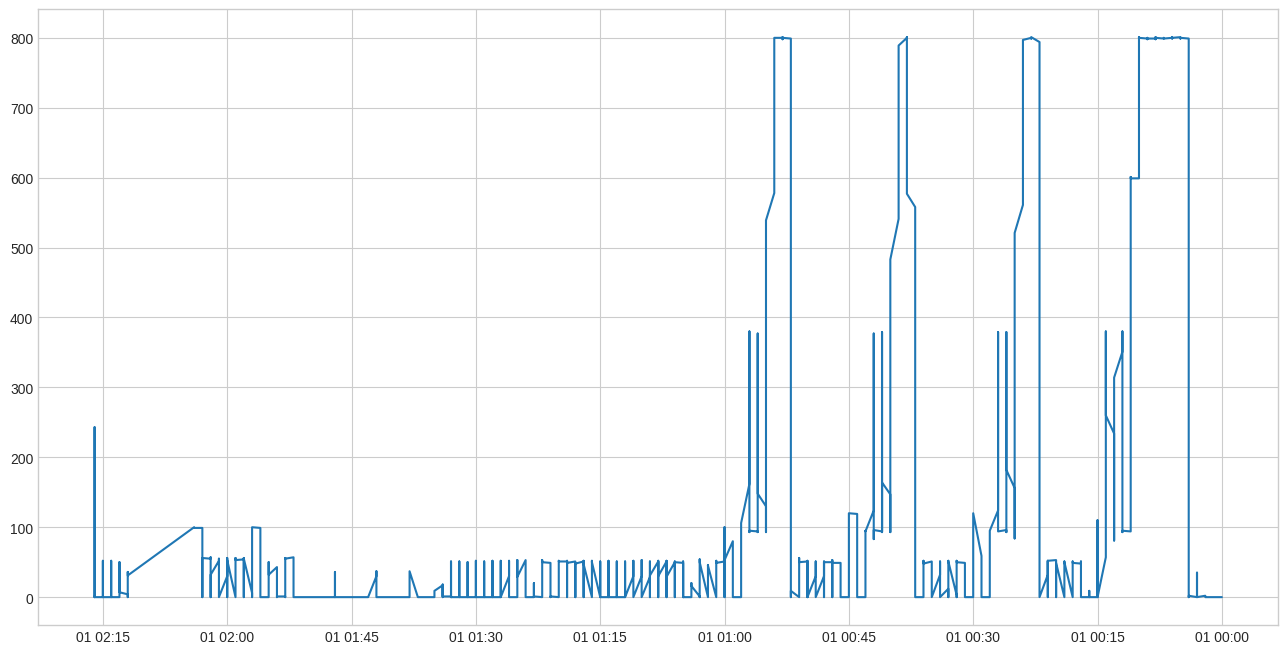

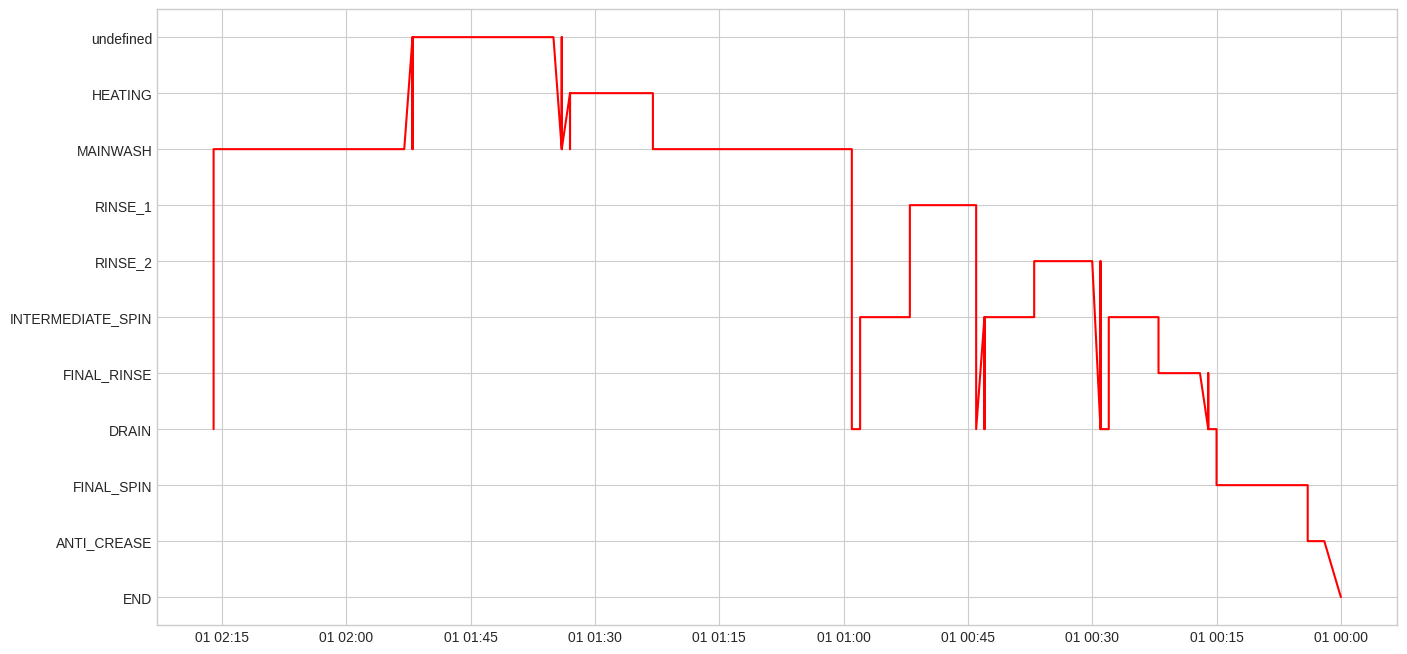

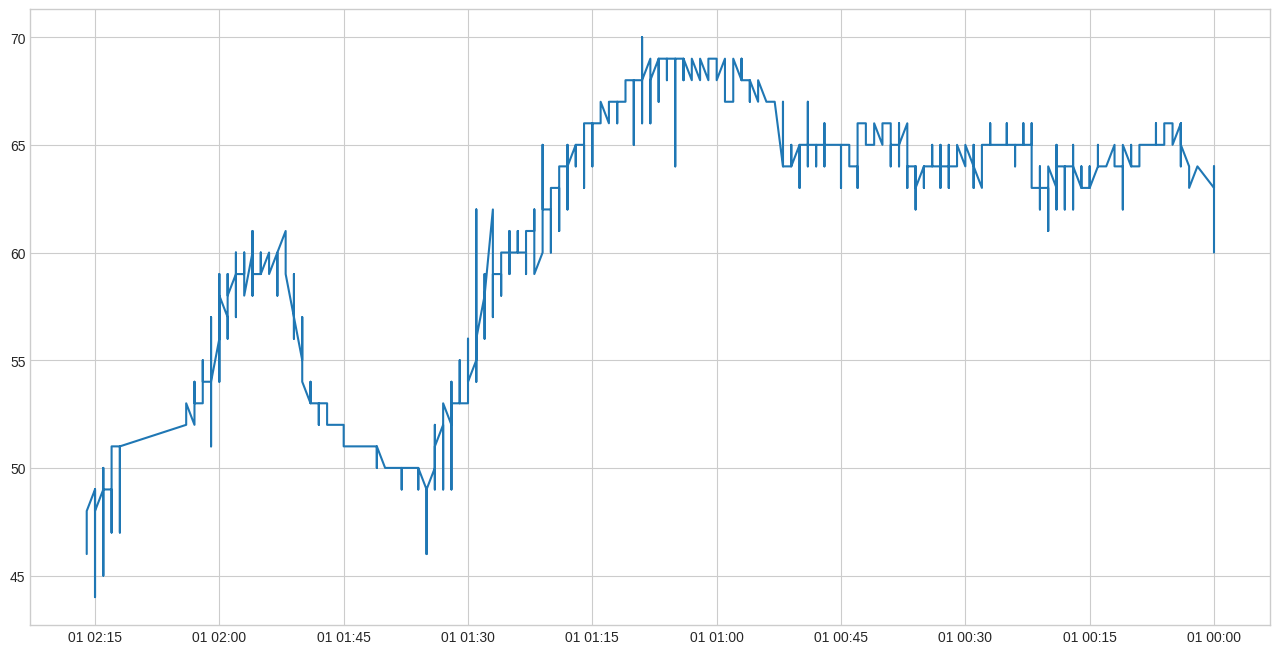

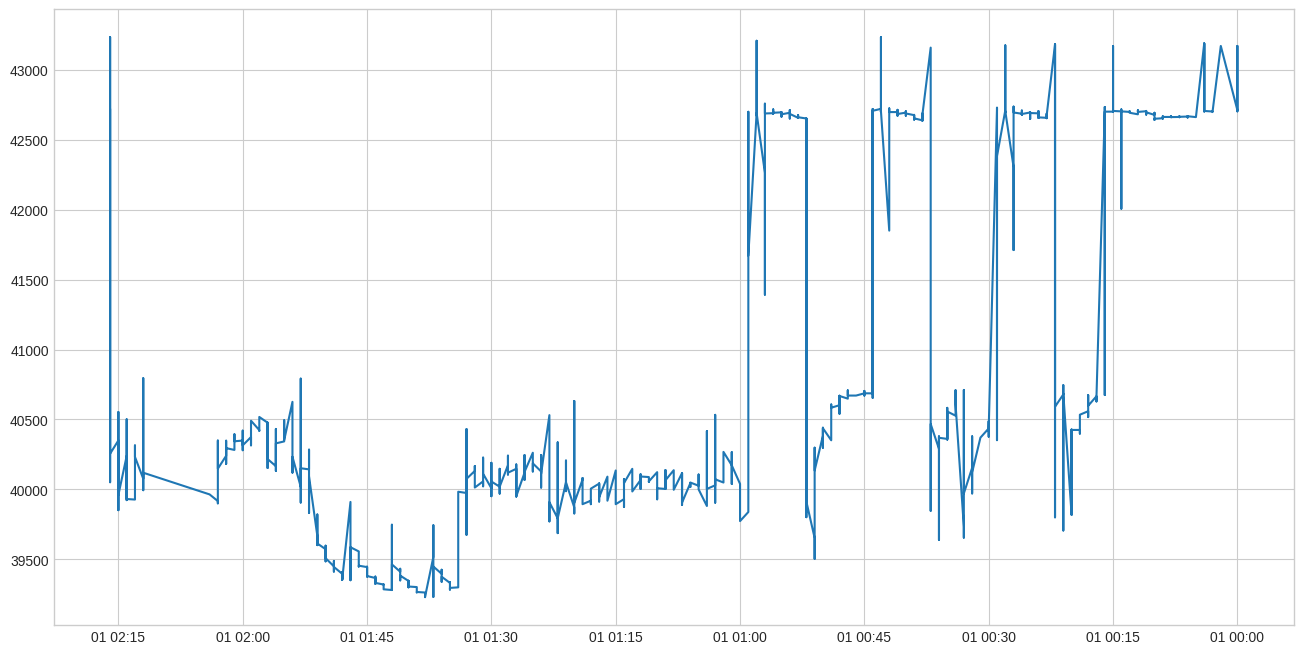

In [ ]:
plotting(k)

In [7]:
rpm_above_200 = []
for index, rpm in k.iloc[:200].iterrows():
  if rpm[7] > 200:
    rpm_above_200.append(rpm[7])
  else:
    "Load Sensing skipped"

print(rpm_above_200)

if rpm_above_200[0] < 230:
    print(f"load sensing rpm is {rpm_above_200} and load size is 10kg")
elif rpm_above_200[0] < 260:
    print(f"load sensing rpm is {rpm_above_200} and load size is 8kg")
elif rpm_above_200[0] < 290:
    print(f"load sensing rpm is {rpm_above_200} and load size is 5kg")
else:
    "Load Sensing skipped"

[243]
load sensing rpm is [243] and load size is 8kg


C:\Users\kunal\AppData\Local\Temp\ipykernel_21548\168222550.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if rpm[7] > 200:
C:\Users\kunal\AppData\Local\Temp\ipykernel_21548\168222550.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rpm_above_200.append(rpm[7])
